# **TP2 Introduction à l'Apprentissage Automatique**
## Anaïs ARTAUD & Marine TROADEC  
### Master 1 Sciences Cognitives

---



Nous avons décidé de traiter les 2 dernières études du sujet :   

* l'introduction de bruit dans les données 
* la présentation de caractères inconnus au réseau

---




In [1]:
# Import 
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
import sklearn
!pip install emnist
from emnist import list_datasets
from random import randint, uniform



# Récupération des données et visualisation



## On récupère les données de train et de test

In [7]:
%%bash
##wget http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/mnist.tgz
curl http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_AA/mnist.tgz
tar xvfz mnist.tgz

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.7M  100 14.7M    0     0  1033k      0  0:00:14  0:00:14 --:--:-- 1047k
tar: Error opening archive: Failed to open 'mnist.tgz'


CalledProcessError: Command 'b'#wget http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/mnist.tgz\ncurl http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_AA/mnist.tgz\ntar xvfz mnist.tgz\n'' returned non-zero exit status 1.

## On met en forme les données d'apprentissage

In [8]:
num_categories = 10

In [9]:
def lecture_images(nom_fichier_image, display=False):
    try:                      
        with open(nom_fichier_image) as f:
            print("lecture des donnees d'entrée depuis le fichier : ", nom_fichier_image)
            tab = np.asarray(list(map(lambda x: np.asarray([x.split()]).reshape(28, 28, 1), f.readlines()))).astype("float32") / 255 # On divise par 255 
# pour normaliser les données et ainsi faire converger le modèle plus rapidement
            if display:
                print(*tab, sep='\n')
            return tab
    except IOError:
        print("le fichier", nom_fichier_image, "n'existe pas")
        return np.asarray([])


def lecture_labels(nom_fichier_labels):
    print("lecture des donnees de sortie depuis le fichier : ", nom_fichier_labels)
    try:
        with open(nom_fichier_labels) as f:
            return to_categorical(np.asarray(list(map(int, f.readlines()))), num_categories)
    except IOError:
        print("le fichier", nom_fichier_labels, "n'existe pas")
        return to_categorical(np.asarray([]), num_categories)


x_train = lecture_images('data/train_image_file.txt')
y_train = lecture_labels('data/train_label_file.txt')


print('x shape = ', x_train.shape)
print('y shape = ', y_train.shape)

lecture des donnees d'entrée depuis le fichier :  data/train_image_file.txt
lecture des donnees de sortie depuis le fichier :  data/train_label_file.txt
x shape =  (60000, 28, 28, 1)
y shape =  (60000, 10)


## Visualisation de la première image :

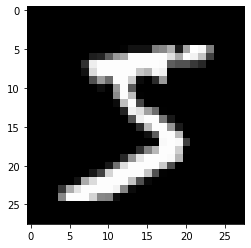

Le chiffre détecté à la première image est  (array([5]),)


In [10]:
imgplot = plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()
print("Le chiffre détecté à la première image est ", np.where(y_train[0]==1.))

# Construction et apprentissage du modèle

In [11]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28


input_shape = (img_rows, img_cols, 1)



In [12]:
def build_model(conv2d_filters=32, conv2d_kernel_size=(2, 2), conv2d_strides=(1, 1), conv2d_activation='relu', conv2d_input_shape=(28, 28, 1), 
                pool2d_pool_size=(2, 2), pool2D_strides=(2, 2), dropout_value=0.5, dense_activation='softmax', model_optimizer='adam', model_loss='mse'):
    model = Sequential([
        Conv2D(filters=conv2d_filters, kernel_size=conv2d_kernel_size, strides=conv2d_strides, activation=conv2d_activation, input_shape=conv2d_input_shape),
        MaxPooling2D(pool_size=pool2d_pool_size, strides=pool2D_strides),
        Flatten(),
        Dropout(dropout_value),
        Dense(num_categories, activation=dense_activation),
    ])
    model.summary()
    model.compile(optimizer=model_optimizer, loss=model_loss, metrics=['accuracy'])
    return model

In [13]:
model = build_model()
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split= 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,250
Trainable params: 54,250
Non-trainable params: 0
_________________________________________________________________
375/375 [==============================] - 5s 13ms/step - loss: 0.0375 - accuracy: 0.7622 - val_loss: 0.0112 - val_acc

### **Autre model**

Le modèle ci dessous présente 2 couches de convolutions et de pooling. La fonction d'acitvation choisi est la fonction *sigmoid*. De plus le nombre de filtre à la seconde couche est de *64*. Le padding défini est *same*.

In [14]:
def build_model_other(conv2d_filters=32,conv2d_filters2= 64, conv2d_kernel_size=(5, 5), conv2d_strides=(1, 1), conv2d_activation='sigmoid', conv2d_input_shape=(28, 28, 1), 
                pool2d_pool_size=(2, 2), pool2D_strides=(2, 2), dropout_value=0.5, dense_activation='softmax', model_optimizer='adam', model_loss='mse'):
    model = Sequential([
        Conv2D(filters=conv2d_filters,padding = 'same',kernel_size=conv2d_kernel_size, strides=conv2d_strides, activation=conv2d_activation, input_shape=conv2d_input_shape),
        MaxPooling2D(pool_size=pool2d_pool_size, strides=pool2D_strides),
        Conv2D(filters=conv2d_filters2, padding = 'same', kernel_size=conv2d_kernel_size, strides=conv2d_strides, activation=conv2d_activation, input_shape=conv2d_input_shape),
        MaxPooling2D(pool_size=pool2d_pool_size, strides=pool2D_strides),
        Flatten(),
        #Dropout(dropout_value),
        Dense(num_categories, activation=dense_activation),
    ])
    model.summary()
    model.compile(optimizer=model_optimizer, loss=model_loss, metrics=['accuracy'])
    return model

In [15]:
model_other = build_model_other()
model_other.fit(x_train, y_train, epochs = 2, batch_size = batch_size, validation_split= 0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0
__________________________________________________

## On met en forme les données de test

In [16]:
x_test = lecture_images('data/test_image_file.txt')
y_test = lecture_labels('data/test_label_file.txt')


lecture des donnees d'entrée depuis le fichier :  data/test_image_file.txt
lecture des donnees de sortie depuis le fichier :  data/test_label_file.txt


## On évalue les prédictions sur les données de test

In [17]:
def evaluate_model(model, x_tr, y_tr, x_te, y_te):
    model.fit(x_tr, y_tr, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    score = model.evaluate(x_te, y_te, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [18]:
evaluate_model(model, x_train, y_train, x_test, y_test)

422/422 [==============================] - 6s 14ms/step - loss: 0.0121 - accuracy: 0.9221 - val_loss: 0.0070 - val_accuracy: 0.9562
Test loss: 0.008573678322136402
Test accuracy: 0.9460999965667725


In [19]:
evaluate_model(model_other, x_train, y_train, x_test, y_test)

422/422 [==============================] - 30s 70ms/step - loss: 0.0071 - accuracy: 0.9567 - val_loss: 0.0049 - val_accuracy: 0.9677
Test loss: 0.005504149477928877
Test accuracy: 0.9649999737739563


# Caractères inconnus. Que se passe-t-il lorsqu’on présente au réseau une entrée qui ne correspond pas à un chiffre ? serait-il possible de créer une nouvelle classe qui corresponde aux images qui ne sont pas des chiffres ?

- Chargement des données

> Ici nous chargeons des données venant de la base EMNIST, cette dernière comprend des lettres et autres caractères. Elles sont sous la meme forme que les données de MNIST.



In [ ]:
# Import des lettres de la dataset  EMNIST
list_datasets()
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')


In [ ]:
# Liste contenant l'alphabet
import string 
def listAlphabet():
  return list(string.ascii_lowercase)
alphabet = listAlphabet()

In [ ]:
xl_train = images_train.reshape(124800,28, 28, 1).astype("float32") / 255
xl_test = images_test.reshape(labels_test.shape[0],28, 28, 1).astype("float32") / 255
yl_train = np.zeros((124800,27))
for j,i in zip(range(0,124800),labels_train) : 
  yl_train[j][i] = 1 
yl_test = np.zeros((labels_test.shape[0],27))
for j,i in zip(range(0,labels_test.shape[0]),labels_test) : 
  yl_test[j][i] = 1 
print('x train shape = ', xl_train.shape)
print('y train shape = ', yl_train.shape)
print('x test shape = ', xl_test.shape)
print('y test shape = ', yl_test.shape)

Les données mises en forme ci-dessus peuvent servir à entrainer un modèle à la reconnaissance des lettres. Leur mise en forme correspond à celle faite pour les données de MNSIT au dessus. Nous n'utliserons par la suite seulement les données xl_trainet xl_test. Il serait possible de combiner les données d'entrée x de lettres avec les chiffres afin d'entrainer un autre model capable de reconnaitres l'ensemble de ces caractères. Cela demanderai de changer les données de y afin que la longueur du vecteur OneHot soit 10 + 27. 

- Visulasition des données

In [ ]:
imgplot = plt.imshow(images_train[0].reshape(28,28), cmap='gray')
plt.show()
print("Le chiffre décté à la première image est ", alphabet[labels_train[0]-1])

Ici nous regardons avec lemodèle entrainé seulement pour reconnaitre des chiffres et paramétrée pour la reconnaissance des chiffres de 0 à 9 quel est la classe prose par la lettre W. 

In [ ]:
yl_pred = model.predict(xl_train[0:10]) 

In [ ]:
print(np.argmax(yl_pred[0]))
print(yl_pred[0])

La lettre W est reconnue comme étant le chiffre 3, mais les prédictions sont très basses. 

- Mise en forme des données (les lettres et les chiffres sont concaténées) 

In [ ]:
x_train2 = np.concatenate((x_train, xl_train[:8000])) # nous récupérons 8000 images de lettres afin d'entrainer le model à niveau égal en les différentes valeurs 


In [ ]:
a = np.array([[0,0,0,0,0,0,0,0,0,0,1] for i in range(0,8000)])
y_train2 = np.concatenate((y_train, [[0] for i in range(0,60000)]),axis = 1 ) # les lettres sont associée dans le model à une 11ième classe.  
y_train2 = np.concatenate((y_train2, a))

In [ ]:
x_test2 = np.concatenate((x_test, xl_test[:1000]))

In [ ]:
a = np.array([[0,0,0,0,0,0,0,0,0,0,1] for i in range(0,1000)])
y_test2 = np.concatenate((y_test, [[0] for i in range(0,10000)]),axis = 1 )
y_test2 = np.concatenate((y_test2, a))
y_test2.shape


(11000, 11)

- Entrainenement du modele 

In [ ]:
num_categories = 11
model_2 = build_model()
model_2.fit(x_train2, y_train2, epochs = epochs, batch_size = batch_size, validation_split= 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                59499     
Total params: 59,659
Trainable params: 59,659
Non-trainable params: 0
_________________________________________________________________
425/425 [==============================] - 21s 49ms/step - loss: 0.0311 - accuracy: 0.7790 - val_loss: 0.0909 - val_

- Evaluation du modele 


In [ ]:
evaluate_model(model_2,x_train2,y_train2,x_test2,y_test2)

479/479 [==============================] - 23s 48ms/step - loss: 0.0137 - accuracy: 0.9033 - val_loss: 0.1442 - val_accuracy: 0.0000e+00
Test loss: 0.020491568371653557
Test accuracy: 0.8567273020744324


La fonction ci-dessous renvoie la fréquence des erreurs de prédiction par classe du model. 

In [ ]:
def err_par_classe(pred , y, taille) :  
    count = [0 for i in range(11)] # nombre de chaque caractère qui doit etre reconnu nombre de (0,1,2,3,4,5,6,7,8,9, lettre)
    err = [0 for i in range(11)]. # liste des erreurs de prédictions selon les caractères 
    for j in range(taille) :        
        count[np.argmax(y[j])] += 1
        if np.argmax(pred[j]) != np.argmax(y[j]) : 
          err[np.argmax(y[j])] += 1      
    for i in range(11) :
      err[i] /= count[i]
    return err

In [ ]:
err_par_classe(model_2.predict(x_test2), y_test2, 11000)

[0.017346938775510204,
 0.016740088105726872,
 0.06782945736434108,
 0.07326732673267326,
 0.06415478615071284,
 0.10650224215246637,
 0.021920668058455117,
 0.07587548638132295,
 0.07905544147843943,
 0.061446977205153616,
 1.0]

On peut remarquer que le modèle n'arrive pas à associer des lettres à une classe particulière qui reconnaitrait que les lettres. En effet cette classe doit normalement être associée à toutes les lettres de l'alphabet. 
Cela peut être du à la ressemblance de certaines lettres avec des chiffres, le modele arrive donc mieux à trouver les ressemblances entre certaines lettres et certains chiffres qu'entre toutes les lettres entre elles. 


# Bruit. 

On peut de manière aléatoire modifier la valeur de certain pixels dans l’image. Comment est ce que les performances décroissent en fonction du taux de pixels modifiés. Que se passe-t-il lorsqu’on ajoute du bruit dans les données d’apprentissage ?

* Implémentation de la fonction *add_noise* qui va créer le bruit dans les données


In [ ]:
def add_noise(x, noise_ratio=0.1):
    x_copy = x.copy()            #On travaille ici sur une copie des données pour ne pas modifier les données de bases 
    nb_pixel = img_rows * img_cols * noise_ratio  
 #      
    for xi in x_copy:
        coords_set = set()     #Pour supprimer les doublons
        while len(coords_set) < nb_pixel:
            x, y = 29, 29     #On fixe x et y à une valeur impossible pour remplir la liste
            while (x, y) == (29, 29):    #Tant que l'aléa retourne (29, 29), on relance un calcul aléatoire pour avoir une nouvelle coordonnées x, y
                x, y = randint(0, img_cols - 1), randint(0, img_rows - 1) 
            coords_set.add((x, y))
        for x, y in coords_set:
            xi[x][y] = uniform(0, 1) #Pour chaque coordonnée dans le set, on change la valeur du pixel avec une valeur aléatoire entre 0 et 1
    return x_copy



---


* On bruite les données

Ici, on bruite les données puis on les affiche à la suite des données non bruitées.

In [ ]:
x_test_noisy = add_noise(x_test)
x_train_noisy = add_noise(x_train)
print("Original")
print(x_test[0])
print("Noisy")
print(x_train_noisy[0])

Original
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.       

On remarque que les données non bruitées comportent une certaine structure : les nuances de gris sont regroupées pour former l'image et tous les autres pixels sont blancs pour constituer le fond de l'image.  
Dans les données bruitées, quelques pixels gris se retrouvent en dehors des groupes de pixels qui constituent les nuances de gris. Ces pixels "parasites" se retrouvent parmi les pixels blancs qui consitutent le fond de l'image et vont donc troubler l'image globale.



---


* Comparaison d'une image bruitée et non bruitée

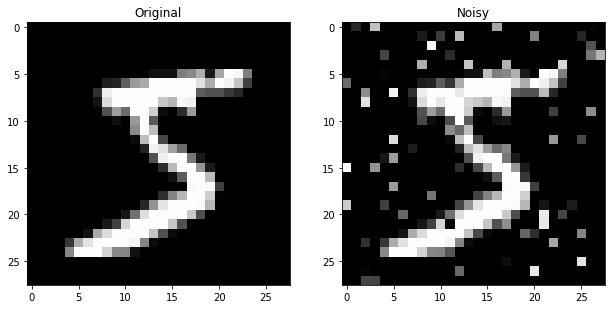

In [ ]:
plt.figure(figsize=(16, 9))

plt.subplot(131)
imgplot = plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title('Original')

plt.subplot(132)
imgplot = plt.imshow(x_train_noisy[0].reshape(28,28), cmap='gray')
plt.title('Noisy')

plt.show()


On peut remarquer que l'image non bruitée est beaucoup plus nette que l'image bruitée, dans laquelle on retrouve les pixels "parasites".



---


* On évalue les prédicitons sur les données bruitées

In [ ]:
evaluate_model(model, x_train, y_train, x_test_noisy, y_test)

422/422 [==============================] - 20s 48ms/step - loss: 0.0102 - accuracy: 0.9340 - val_loss: 0.0061 - val_accuracy: 0.9617
Test loss: 0.04333072528243065
Test accuracy: 0.6991000175476074


In [ ]:
evaluate_model(model, x_train_noisy, y_train, x_test, y_test)

422/422 [==============================] - 21s 49ms/step - loss: 0.0142 - accuracy: 0.9059 - val_loss: 0.0080 - val_accuracy: 0.9475
Test loss: 0.00992005504667759
Test accuracy: 0.9340999722480774


In [ ]:
evaluate_model(model, x_train_noisy, y_train, x_test_noisy, y_test)

422/422 [==============================] - 20s 48ms/step - loss: 0.0117 - accuracy: 0.9241 - val_loss: 0.0075 - val_accuracy: 0.9508
Test loss: 0.008985204622149467
Test accuracy: 0.9412000179290771


# Conclusion


Pour la première étude, sur la détection de lettres nous pouvons conclure qu'il faudrait entrainer le modèle à la détection de ces dernières afin qu'il soit efficace. En effet, créer une classe sensée être associée à toutes les lettres n'est pas pertinant comme la caligraphie des lettres se rapprochent des chiffres. 


Pour la seconde étude, on s'aperçoit que l'introduction de bruit dans les données nuit aux performances du modèle et donc sur la qualité de l'image. Aussi, la précision des prédicitons du modèle est altérée lorsque les données sont bruitées.




Le site internet suivant permet de visualiser les couches de convolution d'un modèle entrainé par la base de données MNIST : https://www.cs.ryerson.ca/~aharley/vis/conv/ développé par Adam W. Harley